In [57]:
pip install streamlit run web_stock_price_predictor.py

  Using cached run-0.2.tar.gz (3.2 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [7 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\vatsa\AppData\Local\Temp\pip-install-nf5bla83\run_6262f2ec13054351a718496ef8b5d60a\setup.py", line 12, in <module>
          long_description=file('README').read(),
                           ^^^^
      NameError: name 'file' is not defined. Did you mean: 'filter'?
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [58]:
import yfinance as yf

In [59]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [60]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [61]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-03-28,4.497262,4.581050,4.485611,4.503707,350830087
2005-03-29,4.451402,4.543370,4.414218,4.488090,259890496
2005-03-30,4.473217,4.498006,4.452146,4.477926,250378977
2005-03-31,4.474704,4.496519,4.403559,4.411244,271758815
2005-04-01,4.463053,4.535189,4.461814,4.505691,248206866


In [62]:
google_data.shape

(5034, 5)

In [63]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,50.557534,51.072325,50.029194,50.537722,1.038657e+08
std,48.375404,48.888279,47.863190,48.349791,1.343530e+08
min,4.451402,4.496519,4.403559,4.411244,1.584340e+05
25%,13.515149,13.667233,13.380607,13.528475,2.615072e+07
50%,28.657525,28.869623,28.440065,28.721236,4.830600e+07
75%,68.967093,69.484635,67.373639,68.573831,1.272100e+08
max,207.473633,208.462496,204.027547,204.267279,1.650833e+09


In [64]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2005-03-28 to 2025-03-27
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5034 non-null   float64
 1   (High, GOOG)    5034 non-null   float64
 2   (Low, GOOG)     5034 non-null   float64
 3   (Open, GOOG)    5034 non-null   float64
 4   (Volume, GOOG)  5034 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 236.0 KB


In [65]:
google_data.isna().sum()


Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [66]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

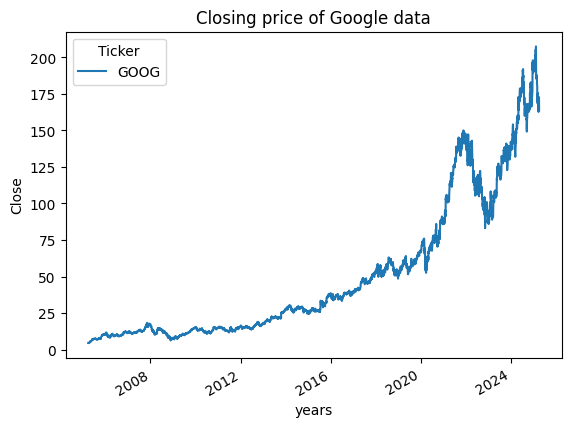

In [68]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")

In [69]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [70]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

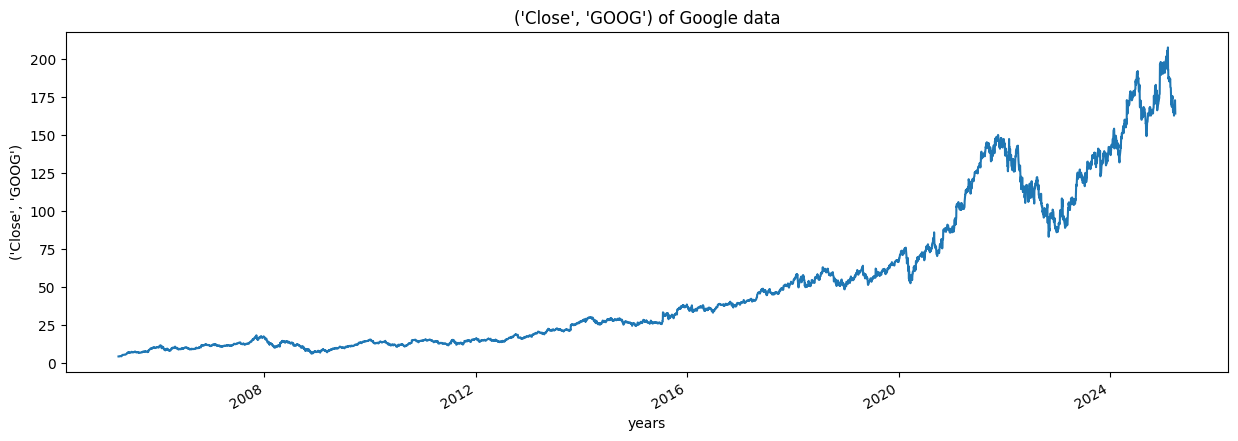

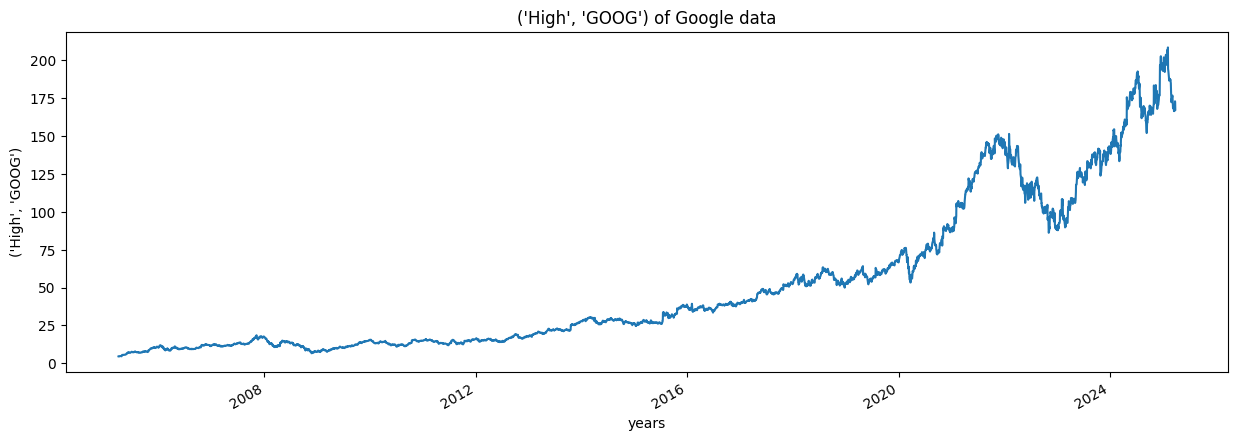

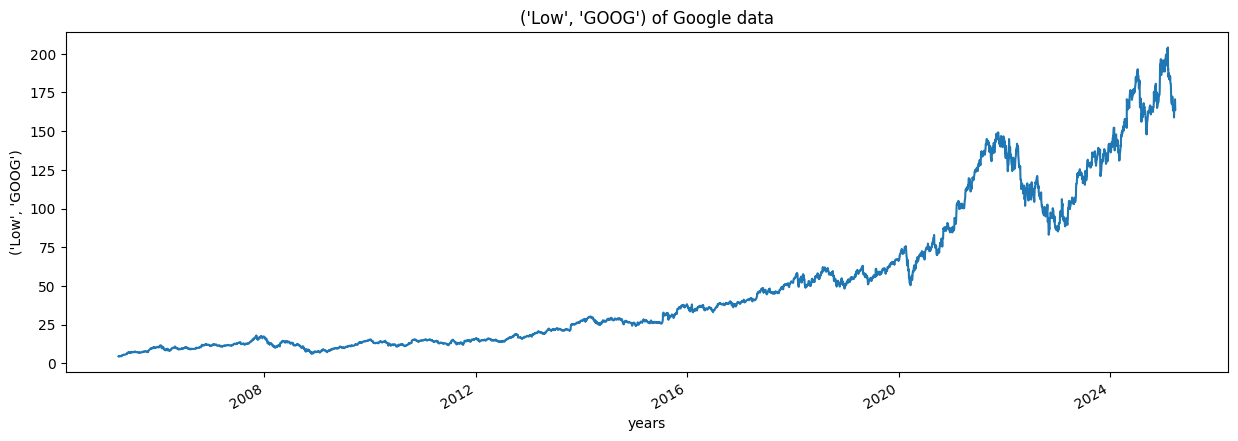

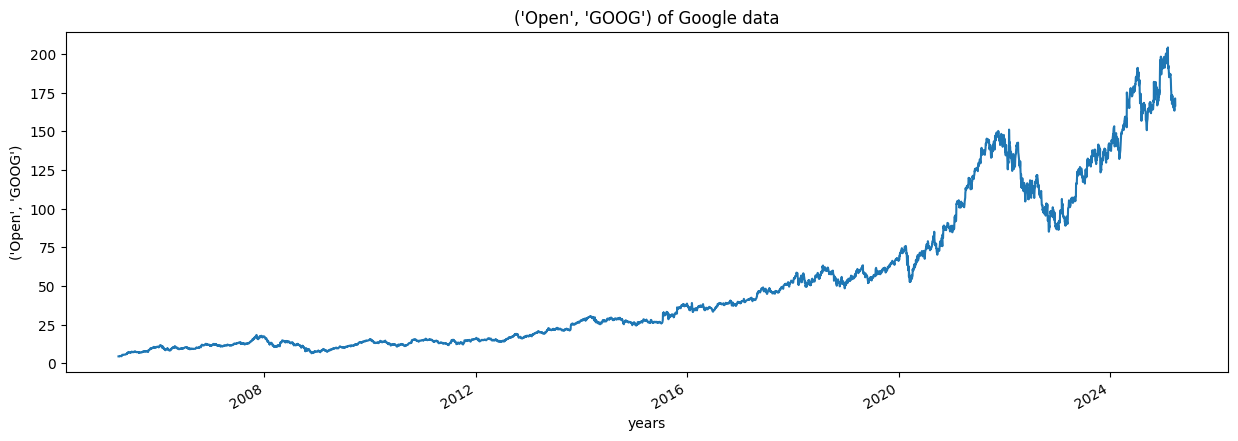

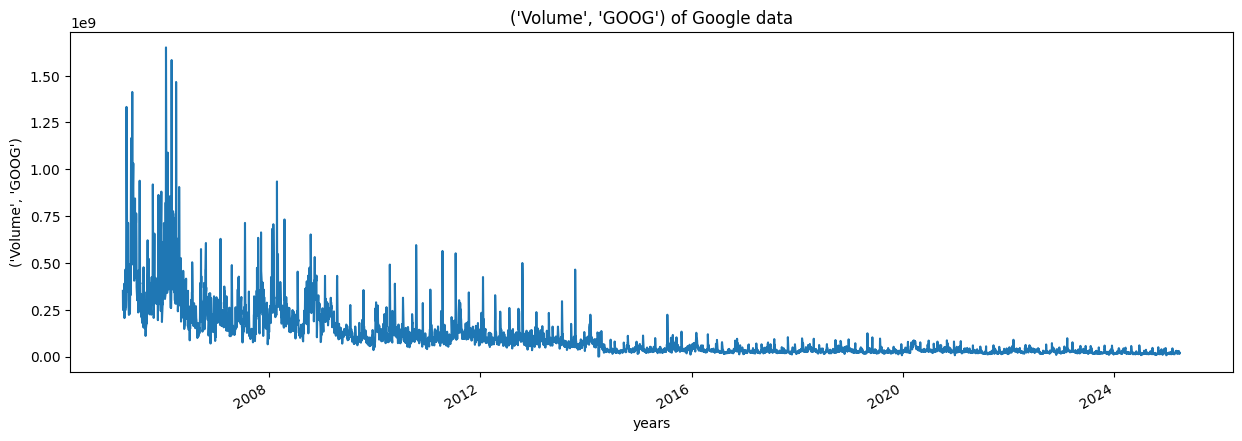

In [71]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [72]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [73]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [74]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [75]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 195
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [76]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [77]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-03-16        NaN
2006-03-17        NaN
2006-03-20        NaN
2006-03-21        NaN
2006-03-22    8.00591
Name: MA_for_250_days, dtype: float64

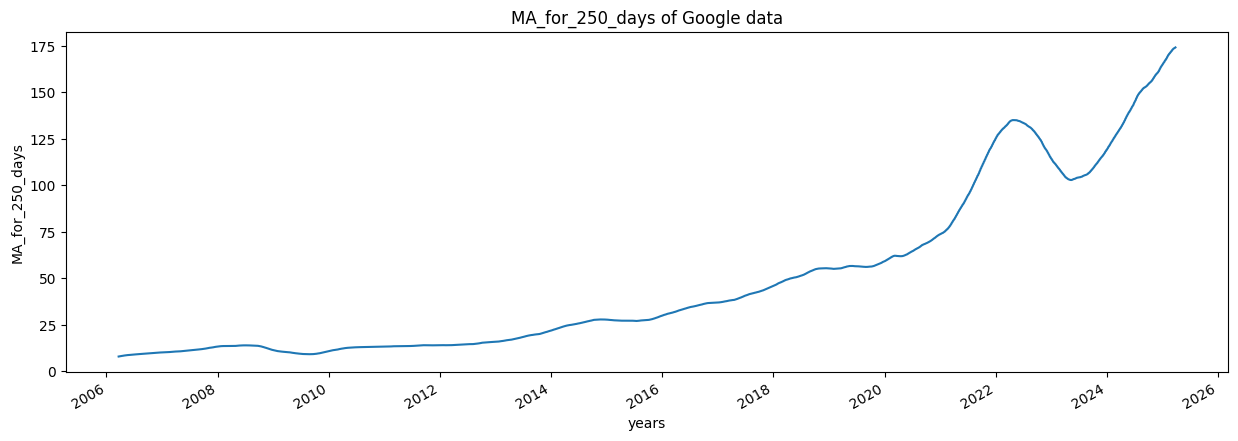

In [78]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

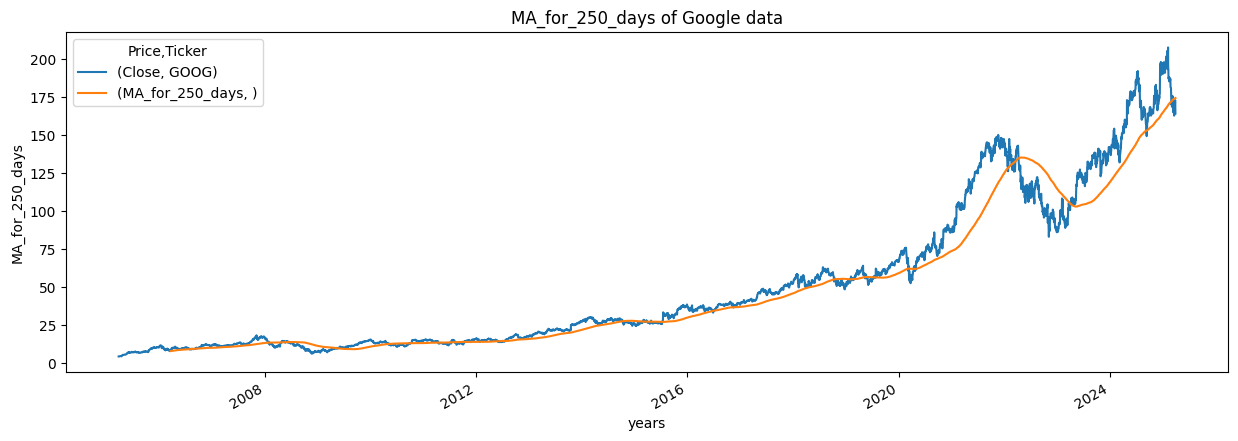

In [79]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

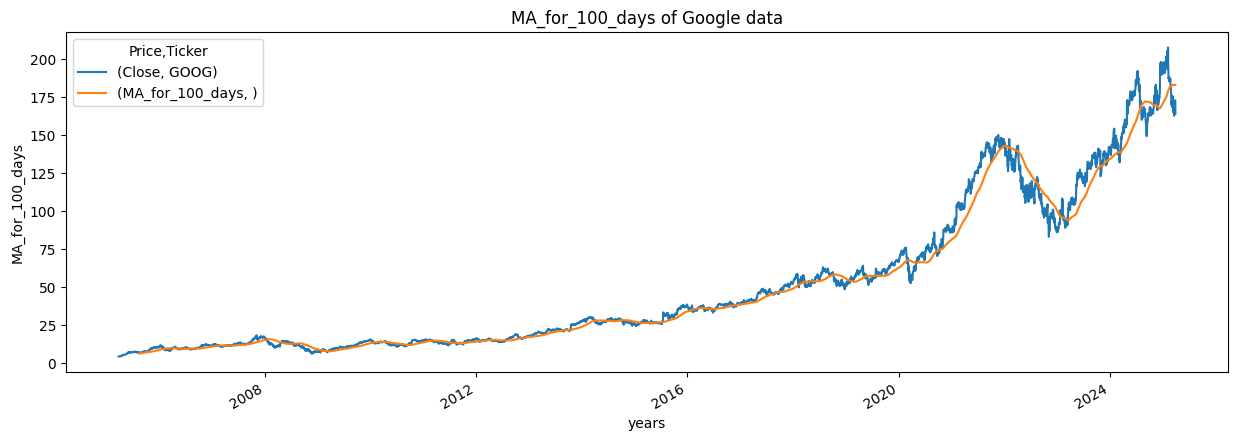

In [80]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

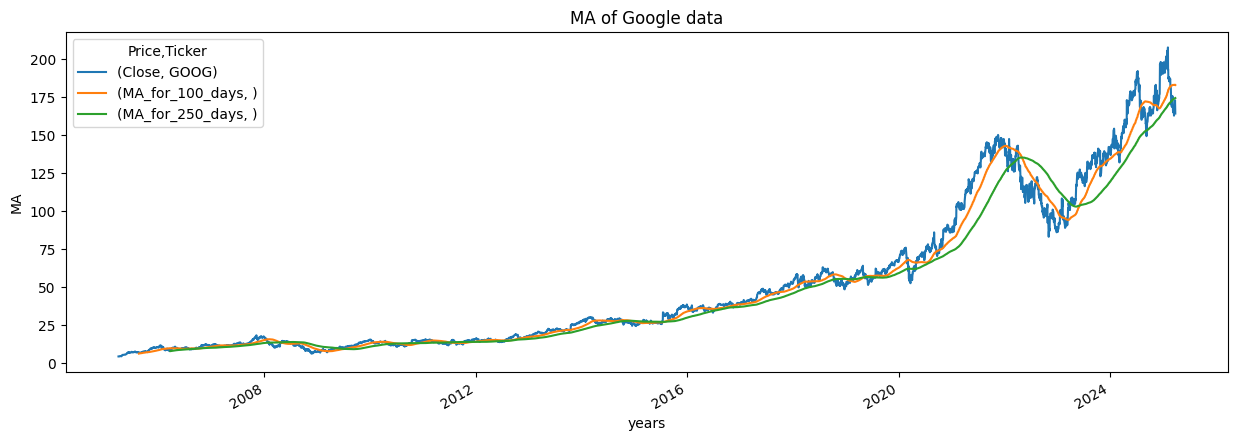

In [81]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [82]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-03-28,4.497262,NaN
2005-03-29,4.451402,-0.010197
2005-03-30,4.473217,0.004901
2005-03-31,4.474704,0.000332
2005-04-01,4.463053,-0.002604


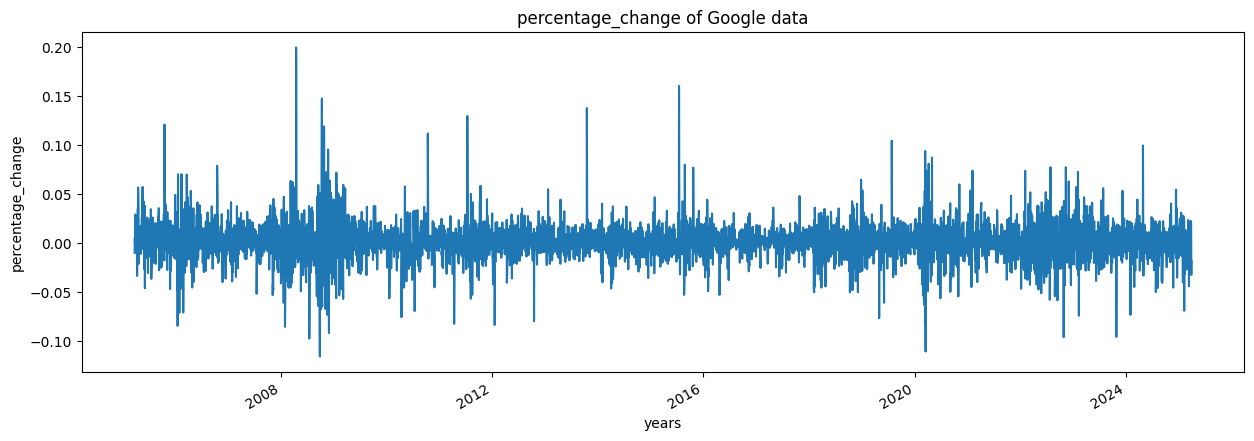

In [83]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [84]:
Adj_close_price = google_data[['Close']]

In [85]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([207.47363281]), array([4.45140219]))

In [86]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[2.25883327e-04],
       [0.00000000e+00],
       [1.07448067e-04],
       ...,
       [8.29163341e-01],
       [8.01333907e-01],
       [7.86261678e-01]])

In [88]:
len(scaled_data)

5034

In [89]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [90]:
x_data[0],y_data[0]

(array([[2.25883327e-04],
        [0.00000000e+00],
        [1.07448067e-04],
        [1.14773645e-04],
        [5.73856481e-05],
        [6.98417135e-04],
        [1.09891179e-03],
        [1.17827182e-03],
        [1.73261066e-03],
        [1.52381878e-03],
        [1.66790178e-03],
        [1.75703473e-03],
        [1.63127154e-03],
        [1.45056065e-03],
        [6.63008220e-04],
        [9.03545050e-04],
        [1.44445640e-03],
        [2.26253246e-03],
        [3.00979304e-03],
        [4.42494243e-03],
        [5.36756271e-03],
        [4.78391922e-03],
        [4.90968006e-03],
        [4.86939055e-03],
        [4.93654677e-03],
        [5.21615648e-03],
        [5.69235190e-03],
        [5.97440425e-03],
        [5.78881278e-03],
        [5.91579494e-03],
        [5.67159649e-03],
        [5.88893057e-03],
        [6.31506592e-03],
        [6.00127097e-03],
        [6.06476087e-03],
        [6.28576361e-03],
        [6.53973497e-03],
        [7.27600367e-03],
        [7.2

In [91]:
int(len(x_data)*0.7)

3453

In [92]:
4908-100-int(len(x_data)*0.7)

1355

In [93]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [94]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


In [95]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [96]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [97]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


c:\Users\vatsa\Downloads\Final\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [98]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [99]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 93s 26ms/step - loss: 2.0547e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 95s 28ms/step - loss: 5.0831e-05


In [100]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [101]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


In [102]:
predictions

array([[0.26508915],
       [0.2635377 ],
       [0.2619235 ],
       ...,
       [0.8088392 ],
       [0.8208363 ],
       [0.8140009 ]], dtype=float32)

In [103]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 58.270393],
       [ 57.955414],
       [ 57.627693],
       ...,
       [168.66374 ],
       [171.09943 ],
       [169.71169 ]], dtype=float32)

In [104]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test


array([[ 58.03860474],
       [ 57.84501648],
       [ 57.93907166],
       ...,
       [172.78999329],
       [167.13999939],
       [164.08000183]])

In [105]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [106]:
rmse

np.float64(2.682783976798757)

In [107]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-05-08,58.038605,58.270393
2019-05-09,57.845016,57.955414
2019-05-10,57.939072,57.627693
2019-05-13,56.334679,57.467300
2019-05-14,55.757904,56.668907


<Figure size 640x480 with 0 Axes>

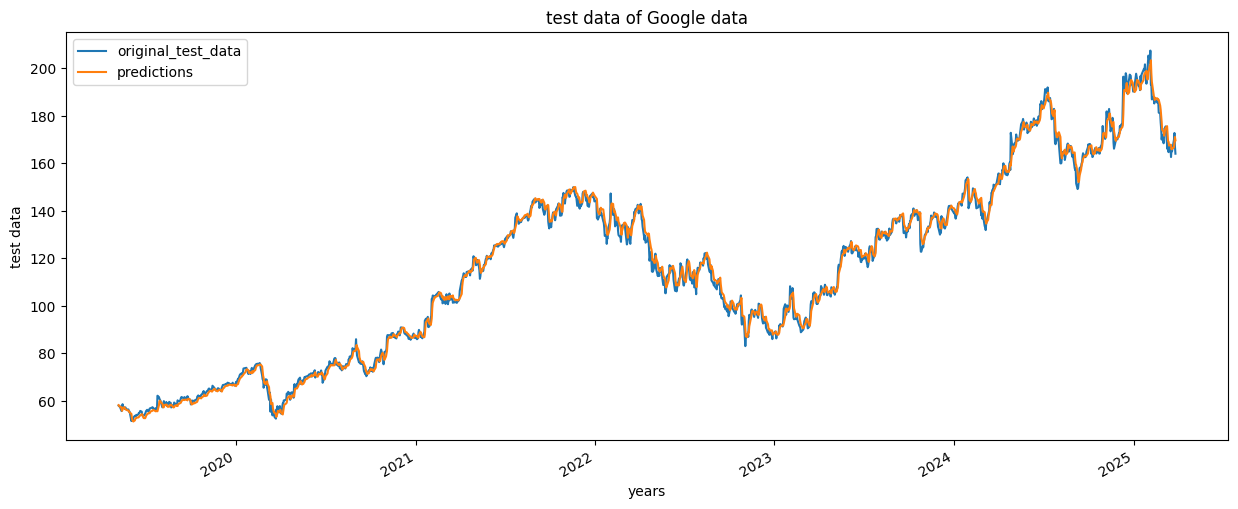

In [108]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

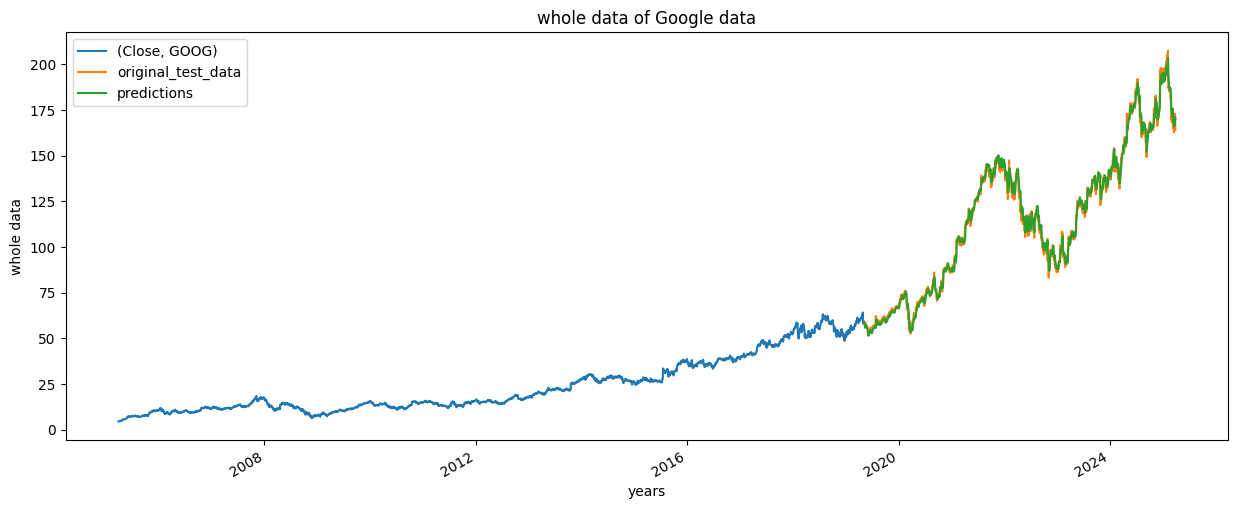

In [109]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [110]:
model.save("Latest_stock_price_model.keras")